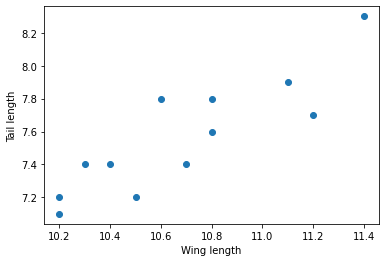

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#create lists with data
x = [10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4]
y = [7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3]

#plot data
plt.scatter(x,y)

plt.xlabel("Wing length")
plt.ylabel("Tail length")

plt.show()

#The two variables look correlated

In [50]:
import statistics as st
import math as math

num = 0
denom_x = 0
denom_y = 0

#find means of each variable
x_mean = st.mean(x)
y_mean = st.mean(y)

#loop through lists to calculate summed portions of Pearson equation
for i in range(len(x)):
    
    num = (x[i]-x_mean)*(y[i]-y_mean) + num
    denom_x = (x[i]-x_mean)**2 + denom_x
    denom_y = (y[i]-y_mean)**2 + denom_y

#calculate correlation coefficient
rxy = num/(math.sqrt(denom_x)*math.sqrt(denom_y))
print(f'The correlation coefficient calculated by equation is {rxy:.4f}.\n')

#use corrcoef function to double check if matches
rxy_matrix = np.corrcoef(x, y)
print(f'The correlation coefficient matrix using the corrcoef function is:\n {rxy_matrix}')


The correlation coefficient calculated by equation is 0.8704.

The correlation coefficient matrix using the corrcoef function is:
 [[1.         0.87035456]
 [0.87035456 1.        ]]


In [45]:
#calculate standard error of rxy
SEr = math.sqrt((1-rxy**2)/(len(x)-2))

print(f'The standard error of the correlation coefficient is {SER:.4f}.')

#use Fisher's z-transformation of r
z = 0.5 * np.log((1+rxy)/(1-rxy))

#compute SD of z value
SDz = math.sqrt(1/(len(x)-3))

#compute CI of z value
CI_z_low = z-(1.96*SDz)
CI_z_high = z+(1.96*SDz)

#convert z values back to r
CI_r_low = (math.exp(2*CI_z_low)-1)/(math.exp(2*CI_z_low)+1)
CI_r_high = (math.exp(2*CI_z_high)-1)/(math.exp(2*CI_z_high)+1)

print(f'The 95% confidence interval of the correlation coefficient is {CI_r_low:.4f} to {CI_r_high:.4f}')

The standard error of the correlation coefficient is 0.1557.
The 95% confidence interval of the correlation coefficient is 0.5923 to 0.9632


In [57]:
import scipy.stats as st

sig = 0.05

#calculate t stat
t = rxy/SEr

#determine t critical values for 2-tailed t test
crit_t_pos = st.t.ppf(1-sig/2, df = len(x)-2)
crit_t_neg = st.t.ppf(sig/2, df = len(x)-2)

if t > crit_t_pos or t < crit_t_neg:
    print(f'The t value is {t:.4f} and is outside of the p < 0.05 critical range of {crit_t_neg:.4f} to {crit_t_pos:.4f}. \nTherefore, we can reject the null hypothesis that the correlation coefficient is equal to 0.')
else:
    print(f'The t value is {t:.4f} and is within the p < 0.05 critical range of {crit_t_neg:.4f} to {crit_t_pos:.4f}. \nTherefore, we cannot reject the null hypothesis that the correlation coefficient is equal to 0.')    


The t value is 5.5893 and is outside of the p < 0.05 critical range of -2.2281 to 2.2281. 
Therefore, we can reject the null hypothesis that the correlation coefficient is equal to 0.


In [58]:
#set null hypothesis r value
rs = 0.75

#convert r to z values
z = 0.5 * np.log((1+rxy)/(1-rxy))
zs = 0.5 * np.log((1+rs)/(1-rs))

#calculate test stat lambda
lamb = (z-zs)/math.sqrt(1/(len(x)-3))

if lamb > crit_t_pos or lamb < crit_t_neg:
    print(f'The t value is {lamb:.4f} and is outside of the p < 0.05 critical range of {crit_t_neg:.4f} to {crit_t_pos:.4f}. \nTherefore, we can reject the null hypothesis that the correlation coefficient is equal to 0.75.')
else:
    print(f'The t value is {lamb:.4f} and is within the p < 0.05 critical range of {crit_t_neg:.4f} to {crit_t_pos:.4f}. \nTherefore, we cannot reject the null hypothesis that the correlation coefficient is equal to 0.75.')    


The t value is 1.0848 and is within the p < 0.05 critical range of -2.2281 to 2.2281. 
Therefore, we cannot reject the null hypothesis that the correlation coefficient is equal to 0.75.


In [67]:
from statsmodels.stats.power import TTestIndPower
obj = TTestIndPower()

p = obj.solve_power(effect_size=0.5, nobs1= len(x), alpha=0.05, ratio=1, alternative='two-sided')
print(f'The power needed to reject the null hypothesis of the correlation coefficient = 0 with a significance of p < 0.05, \nan expected r >= 0.5, and a sample size of {len(x)} is {p:.4f}.')


The power needed to reject the null hypothesis of the correlation coefficient = 0 with a significance of p < 0.05, 
an expected r >= 0.5, and a sample size of 12 is 0.2161.
